In [69]:
import pandas as pd
import numpy as np

In [2]:
df_vocab = pd.read_csv(r"D:\data\openparliament\vocab_count_df")

In [3]:
df_vocab.drop(['Unnamed: 0','wordcount_en'], axis=1, inplace=True)

the word counts they provide don't correspond to anything I can discern

In [4]:
df_vocab.columns

Index(['member_id', ' ', '  ', '   ', '    ', '     ', '      ', '       ',
       '        ', '         ',
       ...
       'uber.1', 'uberminister', 'oeuvrant', 'qoyannamiik', ''', '"', '".1',
       '*', '*support', 'EUR'],
      dtype='object', length=68465)

df.index = df['member_id']

In [5]:
df_wordcount = df_vocab.transpose()
new_header = df_wordcount.iloc[0]
df_wordcount = df_wordcount[1:]
df_wordcount.columns = new_header

In [6]:
vocab_len = df_wordcount.sum(axis=0)

In [7]:
vocab_len.sort_values(ascending=False, inplace=True)

In [8]:
vocab_len.head()

member_id
177     11847
185     11388
11      10551
9187    10406
146     10021
dtype: int64

In [9]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\core_electedmember.csv")

In [10]:
df_electedmember.head()

,id,politician_id,riding_id,party_id,end_date,start_date
0,4015,2693,70159,5,2000-09-11,2000-04-02
1,4016,2693,70159,4,2001-01-28,2000-09-12
2,4017,4136,59023,4,2005-05-23,2002-01-28
3,4018,4983,70116,5,2004-05-23,2002-08-20
4,4019,5258,70139,5,2003-03-14,2003-01-16


In [11]:
df_vocab.head()

,member_id,,,,,,,,,,...,uber.1,uberminister,oeuvrant,qoyannamiik,',"""",""".1",*,*support,EUR
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,216,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
politician_vocab = df_vocab.merge(df_electedmember, how='inner', left_on='member_id', right_on='politician_id')

In [13]:
politician_vocab.drop(['member_id'], axis=1, inplace=True)

'politician_id' is in politician_vocab

In [14]:
politician_vocab.head()

,,,,,,,,,,,...,""".1",*,*support,EUR,id_y,politician_id,riding_id,party_id,end_date,start_date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3210,3465,70224,4,1997-04-27,1994-01-17
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2611,3465,35066,4,2005-11-29,1997-09-22
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1534,173,47007,1,2015-10-19,2004-10-04
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,4305,173,70358,1,NaN,2015-10-19
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,3342,43,47014,28,2000-10-22,1994-01-17


In [15]:
vocab_frame=vocab_len.to_frame()

In [16]:
vocab_frame.head()

,0
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [17]:
vocab_frame.rename({0: 'vocab_size'}, axis=1, inplace=True)

In [18]:
vocab_frame.head()

,vocab_size
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [19]:
vocab_frame.reset_index(inplace=True)

In [20]:
vocab_frame.head()

,member_id,vocab_size
0,177,11847
1,185,11388
2,11,10551
3,9187,10406
4,146,10021


In [21]:
politician_vocab = df_electedmember.merge(vocab_frame, how='inner', left_on='politician_id', right_on='member_id')

In [22]:
politician_vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3364
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3364
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3364
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3364
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2565


In [23]:
politician_vocab.start_date[0]

'2000-04-02'

In [24]:
party_vocab_size = politician_vocab.pivot_table(values='vocab_size', index='party_id', aggfunc='mean')

In [25]:
party_vocab_size.reset_index(inplace=True)

In [26]:
party_vocab_size.sort_values(by='vocab_size', inplace=True)

In [27]:
party_vocab_size.head()

,party_id,vocab_size
9,39,2555.000000
10,46,3137.428571
3,4,3231.884892
2,3,3701.369565
4,5,3929.684211


In [28]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)

party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']

party_df.columns = party_names

In [29]:
party_df.head()

,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,32,Abolitionist Party of Canada,NaN,Abolitionist Party of Canada,Abolitionist Party of Canada,Abolitionist Party of Canada
1,24,Animal Alliance Environment Voters Party of Ca...,NaN,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...
2,30,Canada Party,NaN,Canada Party,Canada Party,Canada Party
3,16,Canadian Action Party,NaN,Canadian Action Party,Canadian Action Party,Canadian Action Party
4,10,Christian Heritage Party of Canada,NaN,Christian Heritage Party of Canada,Christian Heritage Party of Canada,Christian Heritage Party of Canada


In [30]:
party_vocab_size = party_vocab_size.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [31]:
party_vocab_size.sort_values(by='vocab_size', inplace=True, ascending=False)

In [32]:
party_vocab_size.head()

,party_id,vocab_size,id,name_en,slug,short_name_en,name_fr,short_name_fr
10,25,5608.895522,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
9,2,5133.186047,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
8,28,4562.573333,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
7,9,4518.800000,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
6,26,4412.375000,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative


In [33]:
from matplotlib import pyplot as plt

In [34]:
party_vocab_size.fillna('', inplace=True)

In [35]:
y_data = party_vocab_size.vocab_size.values

In [36]:
x_data = party_vocab_size.slug

In [37]:
type(x_data[1])

str

<BarContainer object of 11 artists>

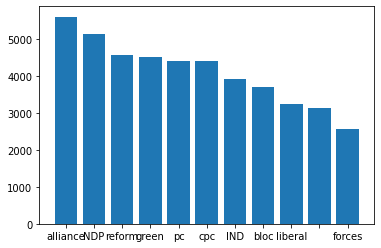

In [38]:
plt.bar(x_data, y_data)

## politician_vocab

In [39]:
politician_vocab.start_date[0]

'2000-04-02'

In [40]:
tenure = pd.to_datetime(politician_vocab.end_date, infer_datetime_format=True) - pd.to_datetime(politician_vocab.start_date, infer_datetime_format=True)  

In [41]:
politician_vocab.start_date = pd.to_datetime(politician_vocab.start_date, infer_datetime_format=True)

In [42]:
politician_vocab.end_date = pd.to_datetime(politician_vocab.end_date, infer_datetime_format=True)

In [43]:
politician_vocab["tenure"] = politician_vocab.end_date - politician_vocab.start_date

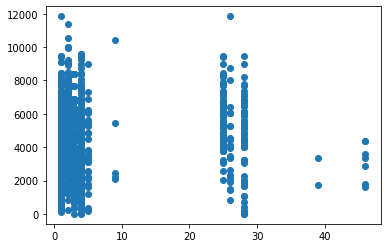

In [44]:
plt.scatter(politician_vocab.party_id, politician_vocab.vocab_size)

In [45]:
t = politician_vocab.tenure[0]

In [46]:
politician_vocab['days_elected'] = politician_vocab.tenure.apply(lambda x: x.days)

Text(0, 0.5, 'estimated vocabulary size')

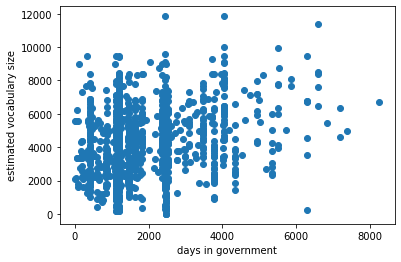

In [47]:
plt.scatter(politician_vocab.days_elected, politician_vocab.vocab_size)
plt.xlabel('days in government')
plt.ylabel('estimated vocabulary size')

next: make a graph of number of utterances in the HoC by vocab size, I suspect it'll just show 
a linear relationship

In [48]:
%%time 
df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")

<string>:2: DtypeWarning: Columns (20,23,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 41.6 s


In [49]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#utterances_df.head()

In [51]:
times_spoken = df.pivot_table(values='slug', index='politician_id', aggfunc='count')

In [52]:
times_spoken.shape

(1051, 1)

In [53]:
times_spoken.rename({'slug': 'utterances'}, axis=1, inplace=True)

In [54]:
times_spoken.head()

,utterances
politician_id,
1,2484
2,4408
5,1164
6,3130
7,1596


In [55]:
times_spoken.reset_index(inplace=True)

In [56]:
#get the rows of times_spoken that are in party_vocab

In [57]:
party_vocab.head()

NameError: name 'party_vocab' is not defined

In [ ]:
vocab_normal = party_vocab.merge(times_spoken, how='left', left_on=party_vocab.politician_id, right_on=times_spoken.politician_id)

In [ ]:
vocab_normal.shape

In [ ]:
vocab_normal.utterances.isna().sum()

In [ ]:
vocab_normal.utterances.describe()

In [ ]:
vocab_normal.columns

In [ ]:
vocab_normal['normalized_utterances'] = vocab_normal['vocab_size']/vocab_normal['utterances']

these vocab_normal numbers are awful, modifying vocab by the word count makes far more sense

In [ ]:
from tokenize_column import tokenize_column

In [ ]:
def tokenize_column (row):
    soup = BeautifulSoup(row)
    text = soup.text.lower()
    words = word_tokenize(text)
    return words

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df = utterances_df

In [ ]:
%%time
df['tokens'] = df.content_en.apply(tokenize_column)

In [ ]:
%%time
df['token_len'] = df.tokens.apply(len)

In [ ]:
df.drop('vocab_den', axis=1, inplace=True)

In [ ]:
speech_len = df.pivot_table(values='token_len', index='member_id', aggfunc=sum)

In [ ]:
speech_len.head()

In [ ]:
speech_len.describe()

In [ ]:
speech_len['pid'] = speech_len.index

In [ ]:
speech_len.reset_index(inplace=True)

In [ ]:
speech_len.head()

merge politician_vocab with speech_len

In [ ]:
politician_vocab = politician_vocab.merge(speech_len, how='inner', left_on='politician_id', right_on='member_id')

In [ ]:
politician_vocab.head()

In [ ]:
import math

In [ ]:
politician_vocab['scaled_vocab'] = politician_vocab.vocab_size/ np.log(politician_vocab.token_len)

In [ ]:
politician_vocab.scaled_vocab.describe()

In [ ]:
plt.scatter(politician_vocab.token_len, politician_vocab.vocab_size)

look at word usage stats

In [ ]:
utterances_df.head()

In [63]:
df.content_en[0]

'<p>Mr. Speaker, I rise on a point of order. I believe you would find unanimous consent following consultation among all parties to further defer the vote just deferred until Monday to next Tuesday at the end of government orders.</p>'

In [73]:
tdf = df[:10]

In [67]:
from ast import literal_eval

In [77]:
%%time
df['wordcount']= df.apply(lambda x: len(literal_eval(x['tokenized_content'])),axis=1)

Wall time: 4min 37s


In [78]:
words_pivot = df.pivot_table(values='wordcount',index='politician_id',aggfunc=sum)

In [81]:
politician_vocab = politician_vocab.merge(words_pivot,left_on='politician_id',right_on='politician_id')

variable completion isn't working, and this is very frustrating to type long variable names

In [83]:
vocab = politician_vocab

In [85]:
vocab['vocab'] = vocab['vocab_size']/vocab['wordcount']

In [86]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [87]:
vocab['colour'] = vocab['party_id'].replace(party_colour_dict)

In [88]:
vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size,tenure,days_elected,wordcount,vocab,colour
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3364,162 days,162.0,292344,0.011507,grey
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3364,138 days,138.0,292344,0.011507,red
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3364,922 days,922.0,292344,0.011507,blue
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3364,1210 days,1210.0,292344,0.011507,red
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2565,1211 days,1211.0,92379,0.027766,red


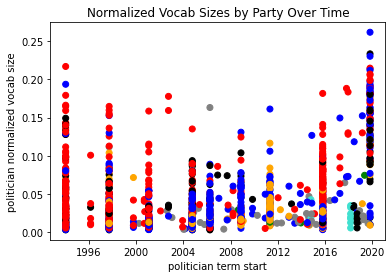

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [99]:
plt.scatter(vocab['start_date'],vocab['vocab'],c=vocab['colour'])
plt.xlabel('politician term start')
plt.ylabel('politician normalized vocab size')
plt.title('Normalized Vocab Sizes by Party Over Time')
plt.figure(figsize=(20,10))
plt.show()
plt.savefig(r'C:\Users\alecr\Projects\openparliament-NLP\word_stats\politician_vocab.png')

In [ ]:
df.pivot_table(values='member_id',index='')